# Prediction of All-NBA Player using 22-23 NBA Player Stats Per Game + Advanced Stats

Author: Xi Cheng

Course Project, UC Irvine, Math 10, F23

## Introduction

The [All-NBA Team](https://en.wikipedia.org/wiki/All-NBA_Team) is an annual National Basketball Association (NBA) honor bestowed on the best players in the league following every NBA season. The voting is conducted by a global panel of sportswriters and broadcasters. Since 1988 it is typically composed of three five-man lineups—a first, second, and third team. Voters selected two guards, two forwards, and one center for each team.

Nowadays, there are rich NBA statistics including many basic stats and more and more powerful advanced stats. All the different stats shows different aspect of the game. 

In this project, I am going to predict the [All-NBA Player of 22-23 season](https://www.nba.com/news/history-all-nba-teams) using the datasets [22-23 NBA Player Stats Per Game](https://www.basketball-reference.com/leagues/NBA_2023_per_game.html) + [Advanced Stats](https://www.basketball-reference.com/leagues/NBA_2023_advanced.html) from basketball-reference.com

## Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

I mannaly export the datasets [22-23 NBA Player Stats Per Game](https://www.basketball-reference.com/leagues/NBA_2023_per_game.html) and [Advanced Stats](https://www.basketball-reference.com/leagues/NBA_2023_advanced.html) to notepad of my PC, and then save as csv files (method I learnt from [here](https://www.wikihow.com/Create-a-CSV-File)). Thus, the datasets in 2022-23 NBA Player Stats - Advanced.csv and 2022-23 NBA Player Stats - Per Game.csv are not perfect.

There is one mistaken column `Player-additional` which I dropped.

In [ ]:
df1 = pd.read_csv("2022-23 NBA Player Stats - Per Game.csv").copy()
df1 = df1.drop(columns=['Player-additional'])
df1

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,...,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
675,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,...,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
676,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,...,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
677,538,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,...,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5


Again, there are mistaken columns `Player-additional','Unnamed: 19','Unnamed: 24` which I dropped.

I use `df2.columns[7:]` to exclude the first several columns because I intend to combine the 2 dataframe into 1 whole dataframe with both basic stats and advanced stats, the first several columns are repeatted in the df1.

In [ ]:
df2 = pd.read_csv("2022-23 NBA Player Stats - Advanced.csv").copy()
df2 = df2.drop(columns=['Player-additional','Unnamed: 19','Unnamed: 24'])
df2_1 = df2[df2.columns[7:]]
df2_1

,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,15.2,0.554,0.267,0.307,9.3,24.4,16.3,6.3,1.3,2.6,11.4,19.4,0.8,1.4,2.2,0.093,-1.4,-0.8,-2.3,-0.1
1,17.5,0.564,0.004,0.490,20.1,25.3,22.7,11.2,1.5,3.7,19.8,14.6,1.3,2.1,3.4,0.144,-0.3,0.9,0.6,0.7
2,20.1,0.592,0.011,0.361,8.0,23.6,15.5,15.9,1.7,2.4,12.7,25.2,3.6,3.8,7.4,0.137,0.8,0.8,1.5,2.3
3,9.5,0.561,0.591,0.179,3.9,6.9,5.4,7.5,0.6,1.0,9.0,15.8,0.9,0.4,1.3,0.053,-1.7,-1.4,-3.0,-0.3
4,13.9,0.591,0.507,0.274,5.4,18.0,11.7,7.6,1.3,2.6,9.3,16.0,2.1,2.4,4.6,0.130,-0.3,0.8,0.5,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,14.1,0.573,0.172,0.131,9.4,14.6,11.8,12.9,3.4,0.6,16.7,13.5,0.7,1.1,1.8,0.109,-1.8,1.9,0.1,0.4
675,22.0,0.573,0.331,0.460,2.4,7.0,4.7,42.5,1.5,0.3,15.2,32.6,5.3,1.4,6.7,0.126,5.3,-2.0,3.3,3.4
676,16.7,0.675,0.259,0.222,10.9,21.9,16.2,3.9,1.2,2.5,11.9,18.0,0.2,0.1,0.3,0.159,-2.5,-1.5,-3.9,0.0
677,16.4,0.659,0.034,0.593,13.0,21.8,17.3,7.2,0.7,1.9,15.8,18.1,0.4,0.3,0.7,0.147,-2.0,-0.7,-2.8,0.0


Combining the 2 dataframe into 1 whole dataframe with both basic stats and advanced stats while dropping the rows with `na` value at the same time, now the df is clean.

In [ ]:
df = pd.concat([df1,df2_1], axis=1).dropna(axis=0).copy()
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,11.4,19.4,0.8,1.4,2.2,0.093,-1.4,-0.8,-2.3,-0.1
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,19.8,14.6,1.3,2.1,3.4,0.144,-0.3,0.9,0.6,0.7
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,12.7,25.2,3.6,3.8,7.4,0.137,0.8,0.8,1.5,2.3
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,9.0,15.8,0.9,0.4,1.3,0.053,-1.7,-1.4,-3.0,-0.3
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,9.3,16.0,2.1,2.4,4.6,0.130,-0.3,0.8,0.5,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,...,16.7,13.5,0.7,1.1,1.8,0.109,-1.8,1.9,0.1,0.4
675,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,...,15.2,32.6,5.3,1.4,6.7,0.126,5.3,-2.0,3.3,3.4
676,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,...,11.9,18.0,0.2,0.1,0.3,0.159,-2.5,-1.5,-3.9,0.0
677,538,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,...,15.8,18.1,0.4,0.3,0.7,0.147,-2.0,-0.7,-2.8,0.0


## Feature Engineering

Now my df has every basic and advanced stats but whether each player is in the All-NBA Team or not. Thus, I use the method inspired by chatgpt, and the list of [22-23 All-NBA Team](https://www.nba.com/news/history-all-nba-teams) to generate a new column

I find the there are difference for the version of name of the players between my original df and the new text, such Luka Doncic in my df is different from Luka Dončić. Thus, I mannaly replaced the wrong names.

As my intro/background info says, there are first, second, and third All-NBA teams, I choose to set my `y` later as all the 3 All-NBA Teams, i.e., `all_nba_team`

In [ ]:
# List of All-NBA Team players for the 2022-2023 season
all_nba_first_team = ["Giannis Antetokounmpo", "Jayson Tatum", "Joel Embiid", "Shai Gilgeous-Alexander", "Luka Doncic"]
all_nba_second_team = ["Jimmy Butler", "Jaylen Brown", "Nikola Jokic", "Donovan Mitchell", "Stephen Curry"]
all_nba_third_team = ["Julius Randle", "LeBron James", "Domantas Sabonis", "De’Aaron Fox", "Damian Lillard"]
#substitude the wrong names, 12/15
all_nba_first_team[-1] = 'Luka Dončić'
all_nba_second_team[2] = 'Nikola Jokić'
all_nba_third_team[3] = "De'Aaron Fox"

all_nba_team = all_nba_first_team + all_nba_second_team +all_nba_third_team
all_nba_team

['Giannis Antetokounmpo',
 'Jayson Tatum',
 'Joel Embiid',
 'Shai Gilgeous-Alexander',
 'Luka Dončić',
 'Jimmy Butler',
 'Jaylen Brown',
 'Nikola Jokić',
 'Donovan Mitchell',
 'Stephen Curry',
 'Julius Randle',
 'LeBron James',
 'Domantas Sabonis',
 "De'Aaron Fox",
 'Damian Lillard']

Define a function to help me to generate a new column whether a player is in the All-NBA Team of the year or not

In [ ]:
# Function to determine All-NBA Team status
def determine_all_nba_team(player):
    if player in all_nba_team:
        return 1
    else:
        return 0

Apply the function to the dataset

In [ ]:
# Apply the function to the dataset
df['All-NBA Team'] = df['Player'].apply(determine_all_nba_team)
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,All-NBA Team
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,19.4,0.8,1.4,2.2,0.093,-1.4,-0.8,-2.3,-0.1,0
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,14.6,1.3,2.1,3.4,0.144,-0.3,0.9,0.6,0.7,0
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,25.2,3.6,3.8,7.4,0.137,0.8,0.8,1.5,2.3,0
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,15.8,0.9,0.4,1.3,0.053,-1.7,-1.4,-3.0,-0.3,0
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,16.0,2.1,2.4,4.6,0.130,-0.3,0.8,0.5,1.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,...,13.5,0.7,1.1,1.8,0.109,-1.8,1.9,0.1,0.4,0
675,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,...,32.6,5.3,1.4,6.7,0.126,5.3,-2.0,3.3,3.4,0
676,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,...,18.0,0.2,0.1,0.3,0.159,-2.5,-1.5,-3.9,0.0,0
677,538,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,...,18.1,0.4,0.3,0.7,0.147,-2.0,-0.7,-2.8,0.0,0


Check, now I can successfully identify all the `15` players who is in the All-NBA Team of the year. As I said above, there are only 12 players successfully identify before I mannaly substitude the wrong name

In [ ]:
print(len(df[df['All-NBA Team']==1]))
df[df['All-NBA Team']==1]

15


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,All-NBA Team
12,11,Giannis Antetokounmpo,PF,28,MIL,63,63,32.1,11.2,20.3,...,38.8,4.9,3.7,8.6,0.204,5.8,2.7,8.5,5.4,1
85,64,Jaylen Brown,SF,26,BOS,67,67,35.9,10.1,20.6,...,31.4,1.6,3.4,5.0,0.100,1.5,-0.2,1.3,2.0,1
100,75,Jimmy Butler,PF,33,MIA,64,64,33.4,7.5,13.9,...,25.6,9.4,2.9,12.3,0.277,6.7,2.0,8.7,5.8,1
139,108,Stephen Curry,PG,34,GSW,56,56,34.7,10.0,20.2,...,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7,1
160,125,Luka Dončić,PG,23,DAL,66,66,36.2,10.9,22.0,...,37.6,7.3,2.9,10.2,0.204,7.6,1.4,8.9,6.6,1
184,143,Joel Embiid,C,28,PHI,66,66,34.6,11.0,20.1,...,37.0,8.4,3.9,12.3,0.259,6.8,2.3,9.2,6.4,1
198,153,De'Aaron Fox,PG,25,SAC,73,73,33.4,9.3,18.2,...,30.1,5.5,1.8,7.4,0.146,3.4,-0.9,2.5,2.7,1
209,164,Shai Gilgeous-Alexander,PG,24,OKC,68,68,35.5,10.4,20.3,...,32.8,8.4,3.0,11.4,0.226,5.7,1.5,7.3,5.6,1
306,239,LeBron James,PF,38,LAL,55,54,35.5,11.1,22.2,...,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0,1
318,249,Nikola Jokić,C,27,DEN,69,69,33.7,9.4,14.8,...,27.2,11.2,3.8,14.9,0.308,8.5,4.5,13.0,8.8,1


I want to set some limit using all the features/stats that I have to make the df that I am going to do the machine learning tranning closer to a tranning and testing dataset which make senses. Originally there are 624 rows/Players in the sample, if I do not set additional limits, there is too much noice in the dataset. 

I set the conditions: 
* `df['GS']/df['G'] > 0.9` means (Game_Start / Game_Played)>90%, which indicates that the player is a solid Start Player.
* `df['G']>41` means (Game_Played)>41 where there are 82 games per season, which indicates that the player at least play 50% games of the season
* `df['MP']>30` means (Minites_Played per game)>30 where there are 48 minutes per game, which indicates that the player must play sufficient time per game.

Then, I have `92` players left in my sample who are almost all famous and good Started players left, which accord with the standard of All-NBA Player, which are the BEST NBA Player.
I further sorted the df by `Tm` Team in order for NBA fans to look at this df better, where I learnt the method from Chatgpt

In [ ]:
df = df[(df['GS']/df['G'] > 0.9) & (df['G']>41) & (df['MP']>30)]
df.sort_values(by='Tm')

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,All-NBA Team
675,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,...,32.6,5.3,1.4,6.7,0.126,5.3,-2.0,3.3,3.4,0
285,224,De'Andre Hunter,SF,25,ATL,67,67,31.7,5.7,12.3,...,19.7,1.4,1.2,2.5,0.057,-1.9,-1.4,-3.3,-0.7,0
442,351,Dejounte Murray,SG,26,ATL,74,74,36.4,8.3,17.8,...,24.4,2.4,2.3,4.7,0.084,1.1,0.0,1.0,2.1,0
278,217,Al Horford,C,36,BOS,63,63,30.5,3.6,7.6,...,11.9,3.6,2.7,6.3,0.157,1.6,1.7,3.3,2.5,0
590,465,Jayson Tatum,SF,24,BOS,74,74,36.9,9.8,21.1,...,32.7,6.2,4.3,10.5,0.185,4.8,0.7,5.5,5.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,93,Jordan Clarkson,SG,30,UTA,61,61,32.6,7.5,16.9,...,27.8,0.9,0.8,1.7,0.042,1.0,-2.4,-1.4,0.3,0
392,307,Lauri Markkanen,PF,25,UTA,66,66,34.4,8.7,17.3,...,26.6,6.3,1.9,8.2,0.173,4.9,-1.0,3.8,3.3,0
502,393,Kristaps Porziņģis,C,27,WAS,65,65,32.6,7.8,15.7,...,27.4,5.0,2.7,7.7,0.174,3.8,0.5,4.3,3.4,0
355,278,Kyle Kuzma,PF,27,WAS,64,64,35.0,8.0,17.8,...,27.9,-1.0,1.9,0.9,0.019,-0.2,-1.5,-1.7,0.2,0


## Feature Selection 

I want to evaluate how significant the stats are using the correlation between the stats and my `y` where I learnt from [How to Create a Correlation Matrix using Pandas](https://datatofish.com/correlation-matrix-pandas/)


In [ ]:
df_corr = df.corr()
df_corr[['All-NBA Team']]

,All-NBA Team
Rk,-0.009642
Age,0.095926
G,0.001436
GS,0.008730
MP,0.292817
FG,0.556520
FGA,0.449231
FG%,0.300232
3P,0.082090
3PA,0.115434


I learnt how to draw a Seaborn Correlation Heatmap using sns and plt from [How to Create a Seaborn Correlation Heatmap in Python?
](https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e)

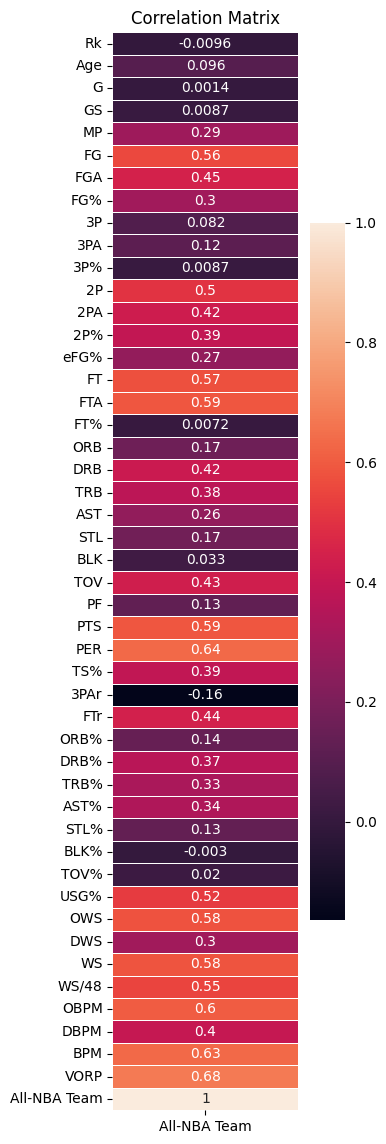

In [ ]:
plt.figure(figsize=(3, 14))
sns.heatmap(df_corr[['All-NBA Team']], annot=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

This shows how powerful some of the advanced stats are that they can effectly shows how good a player is. After [researching](https://www.basketball-reference.com/about/bpm2.html) `BPM` is directly calculated from `VORP`, `VORP = [BPM - (-2.0)] * (% of possessions played) * (team games/82)`, I decided to only use the top 2 advanced stats `VORP` and `PER` to do my prediction

I learnt how to correctly write this code panda dataframe sort and index using chatgpt

In [ ]:
ser_corr = df_corr['All-NBA Team']
X1_top2_adv = ser_corr[ser_corr.sort_values(ascending=False) > 0.634].index[:-1]
X1_top2_adv

Index(['PER', 'VORP'], dtype='object')

In [ ]:
ser_corr.sort_values(ascending=False)

All-NBA Team    1.000000
VORP            0.676011
PER             0.635366
BPM             0.633779
OBPM            0.600178
FTA             0.589323
PTS             0.588607
WS              0.583851
OWS             0.580939
FT              0.573517
FG              0.556520
WS/48           0.548067
USG%            0.523896
2P              0.502456
FGA             0.449231
FTr             0.441352
TOV             0.432466
2PA             0.423059
DRB             0.416201
DBPM            0.402551
2P%             0.392843
TS%             0.387752
TRB             0.375298
DRB%            0.366110
AST%            0.339411
TRB%            0.325540
FG%             0.300232
DWS             0.299737
MP              0.292817
eFG%            0.265468
AST             0.260654
STL             0.173772
ORB             0.165056
ORB%            0.142607
STL%            0.131656
PF              0.130330
3PA             0.115434
Age             0.095926
3P              0.082090
BLK             0.032665


## Machine Learning Model Creation/Evaluation

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[X1_top2_adv], df['All-NBA Team'], train_size=0.7, random_state=33)

### Logistic Classification

The scores look pretty good. On the one hand, this good score demostrate how powerful the advanced stats is to show how good a player is. On the other hand, I doubt do I set my proposition of prediction `y` well. Because if I simply check the top 15 players of a `VORP`(Value over replacement player, a advanced stats) or `PTS`(Points per game, most important basic stats), there will be a (10~12)/15 of All-NBA Team in the top 15. Although, use I use some of the not most significant stats to sort, the accuracy won't be this high. Anyway, good job.

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(max_iter=400)
clf_lr.fit(X_train, y_train)

print("Logistic Regression Model")
print("Training accuracy:", clf_lr.score(X_train, y_train))
print("Test accuracy:", clf_lr.score(X_test, y_test))

Logistic Regression Model
Training accuracy: 0.921875
Test accuracy: 0.9285714285714286


Let's using altair to visualize the graph between my two Xs, `PER`, `VORP`, and the y, `All-NBA Team`.
Also include tooltip of `Player`, `Team`, `Points per game` in order to better provide information for NBA fans.

From this graph, we can tell that the more PER and especially VORP, the more likely All-NBA Team

In [ ]:
alt.Chart(df).mark_circle().encode(
    x=alt.X("VORP", scale=alt.Scale(zero=False)),
    y=alt.Y("PER", scale=alt.Scale(zero=False)),
    color="All-NBA Team:N",
    tooltip = ['Player','Tm','PTS',"VORP","PER"]
).properties(
    title="All-NBA Team Shown By VORP and PER"
)

alt.Chart(...)

In [ ]:
df['lr_Result'] = clf_lr.predict(df[X1_top2_adv])
df

/tmp/ipykernel_66/2545201439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lr_Result'] = clf_lr.predict(df[X1_top2_adv])


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,All-NBA Team,lr_Result
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,3.6,3.8,7.4,0.137,0.8,0.8,1.5,2.3,0,0
9,8,Jarrett Allen,C,24,CLE,68,68,32.6,5.9,9.2,...,5.5,4.0,9.5,0.205,1.3,1.0,2.4,2.4,0,0
12,11,Giannis Antetokounmpo,PF,28,MIL,63,63,32.1,11.2,20.3,...,4.9,3.7,8.6,0.204,5.8,2.7,8.5,5.4,1,1
15,14,OG Anunoby,SF,25,TOR,67,67,35.6,6.3,13.2,...,1.8,2.9,4.7,0.094,-0.3,0.7,0.4,1.5,0,0
20,17,Deandre Ayton,C,24,PHO,67,67,30.4,7.8,13.2,...,3.3,3.0,6.2,0.147,0.9,0.0,0.9,1.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,485,Fred VanVleet,PG,28,TOR,69,69,36.7,6.3,16.1,...,3.7,2.8,6.5,0.123,2.0,0.5,2.5,2.9,0,0
622,489,Nikola Vučević,C,32,CHI,82,82,33.5,7.3,14.0,...,3.9,4.4,8.3,0.145,1.9,0.7,2.7,3.2,0,0
624,491,Franz Wagner,SF,21,ORL,80,80,32.6,6.8,14.0,...,3.1,2.3,5.4,0.099,0.4,-0.5,-0.1,1.3,0,0
635,500,P.J. Washington,PF,24,CHO,73,73,32.6,5.9,13.4,...,0.4,2.2,2.6,0.052,-1.0,-0.3,-1.3,0.4,0,0


### Decision Tree Classifier

The scores of Decision Tree Classifier is even better than Logistic.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

clf_tree = DecisionTreeClassifier(max_leaf_nodes=3, random_state=2)
clf_tree.fit(X_train, y_train)

print("Decision Tree Model")
print("Training accuracy:", clf_tree.score(X_train, y_train))
print("Test accuracy:", clf_tree.score(X_test, y_test))

Decision Tree Model
Training accuracy: 0.953125
Test accuracy: 0.9642857142857143


Use the method Prof.Sha taught in class to see the decision tree to evaluate if there is overfitting proble. 

I seems the condition of the tree look good while there is no obvious overfitting problem because it agrees with what we expect that the higher `VORP` is, the more likely `All-NBA Team`. Secondly, while if `VORP` is median high but `PER` is high, it still could possibly be in `All-NBA Team`. Thirdly, if both `VORP` and `PER` is low, we predict it is not `All-NBA Team`

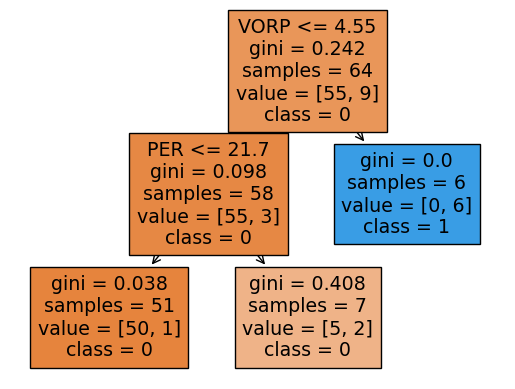

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure()

# Convert class_names to strings if they are not already
class_names = [str(class_name) for class_name in clf_tree.classes_]

_ = plot_tree(clf_tree, 
              feature_names=clf_tree.feature_names_in_,
              class_names=class_names,  # Use the converted class_names
              filled=True)


### Random Forest Classifier

Let's use Random Forest Classifier to evaluate the good score from Decision Tree.

The score still looks simillar

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(n_estimators=200, max_leaf_nodes=3,random_state=2)
clf_forest.fit(X_train, y_train)

print("Random Forest Model")
print("Training accuracy:", clf_forest.score(X_train, y_train))
print("Test accuracy:", clf_forest.score(X_test, y_test))

Random Forest Model
Training accuracy: 0.953125
Test accuracy: 0.9642857142857143


Finally,let's visalize the boundry of our Random Forest.

In [ ]:
rng = np.random.default_rng()
arr = rng.random(size = (5000,2))

In [ ]:
df3 = pd.DataFrame(arr, columns=X1_top2_adv)
df3.head(5)

,PER,VORP
0,0.529989,0.916397
1,0.961482,0.378611
2,0.928898,0.584705
3,0.583184,0.104014
4,0.516506,0.038385


In [ ]:
df3["PER"] *= 40
df3["VORP"] *= 10
df3['pred'] = clf_forest.predict(df3[X1_top2_adv])

In [ ]:
df3

,PER,VORP,pred
0,21.199574,9.163968,1
1,38.459287,3.786108,0
2,37.155906,5.847048,1
3,23.327379,1.040143,0
4,20.660227,0.383845,0
...,...,...,...
4995,34.041293,5.940254,1
4996,37.745077,8.526217,1
4997,8.708129,1.684154,0
4998,27.385987,6.370831,1


In [ ]:
alt.Chart(df3).mark_circle().encode(
    x = "VORP",
    y = "PER",
    color = 'pred:N'
)

alt.Chart(...)

The boundry looks good, not much overfitting.

## Summary

There are some powerful advanced stats which can powerfully show whether a player is good or not while All-NBA Team is just about the best players, the prediction we did.

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?

All-NBA Player of 22-23 season from NBA.com https://www.nba.com/news/history-all-nba-teams

22-23 NBA Player Stats Per Game from basketball-reference.com https://www.basketball-reference.com/leagues/NBA_2023_per_game.html) 

Advanced Stats from basketball-reference.com https://www.basketball-reference.com/leagues/NBA_2023_advanced.html

* List any other references that you found helpful.

All-NBA Team Wiki (https://en.wikipedia.org/wiki/All-NBA_Team)
How to Create a Correlation Matrix using Pandas Dataframe(https://datatofish.com/correlation-matrix-pandas/)
How to mannaly expert from Notepad to csv (https://www.wikihow.com/Create-a-CSV-File))
How to Create a Seaborn Correlation Heatmap in Python? (https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e)
VORP Formula, direct relation with BPM (https://www.basketball-reference.com/about/bpm2.html)
Panda Dataframe Sort https://chat.openai.com/